In [2]:
#import and folder set up
import os
import charts_function_list
base,data_folder,outputs=charts_function_list.folder_setup()

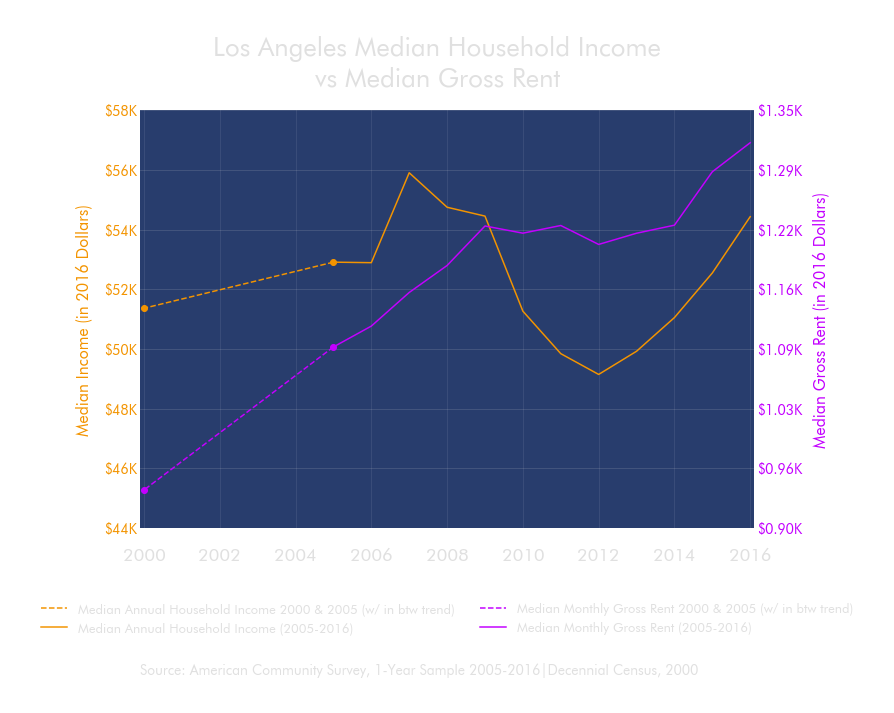

In [85]:
#data
os.chdir(data_folder)
rent_vs_income = pd.read_csv('los_angeles_income_rent_comparison.csv')

year_2000 = rent_vs_income.iloc[-2:,:]
rent_vs_income = rent_vs_income.iloc[0:-1]

#set up
plt.rcParams["font.family"] = "Futura Bk BT"
text_color = '#e0e0e0'
income_chart = charts_function_list.chart_maker('Los Angeles Median Household Income\nvs Median Gross Rent',title_size=26,)
fig = income_chart.initial_fig_axis()
fig.subplots_adjust(top=.85)
ax = income_chart.axes_set_up(fig)
ax2 = ax.twinx()

fig.suptitle('Los Angeles Median Household Income\nvs Median Gross Rent',color=text_color,fontsize=26)
income_chart.patch_adder(ax=ax,facecolor='#283d6d',zorder=0)


#set a few default variables
colors=['#f39400','#c300ff']


labels = ['Median Annual Household Income (2005-2016)','Median Annual Household Income 2000 & 2005 (w/ in btw trend)',
         'Median Monthly Gross Rent (2005-2016)','Median Monthly Gross Rent 2000 & 2005 (w/ in btw trend)']


l1 = ax.plot(rent_vs_income['Year'],rent_vs_income['Median Income 2016 Dollars'],color=colors[0],label=labels[0],zorder=3)
l2 = ax.plot(year_2000['Year'],year_2000['Median Income 2016 Dollars'],linestyle='--',color=colors[0],label = labels[1],zorder=3)
l3 = ax2.plot(rent_vs_income['Year'],rent_vs_income['Rent 2016 Dollars'],color=colors[1],label=labels[2],zorder=3)
l4 = ax2.plot(year_2000['Year'],year_2000['Rent 2016 Dollars'],linestyle='--',color=colors[1],label= labels[3],zorder=3)



#add scatters
ax.scatter(year_2000['Year'],year_2000['Median Income 2016 Dollars'],color=colors[0],label=None,zorder=3)
ax2.scatter(year_2000['Year'],year_2000['Rent 2016 Dollars'],color=colors[1],label=None,zorder=3)


#add labels and legend
lns = l2+l1+l4+l3
labs = [l.get_label() for l in lns]
legend = ax.legend(lns, labs, bbox_to_anchor=(.5,-.15),loc=9,ncol=2,fontsize=13)
for text in legend.get_texts():
    text.set_color(text_color)

#tick labels and things


ax.set_ylim(44000,58000)



ax.set_yticks([44000 + (2000*x) for x in range(8)])
ax.set_yticks(np.linspace(44000,58000,8))
ax2.set_yticks(np.linspace(900,1350,8))
ax.set_yticklabels(['$'+'%s'%int(x/1000)+'K' for x in ax.get_yticks()],color=colors[0],fontsize=14)
ax2.set_yticklabels(['$'+'%.2f'%(x/1000)+'K' for x in ax2.get_yticks()],color=colors[1],fontsize=14)
income_chart.tick_params_(ax,axis='x',pad=20,fontsize=18,labelcolor=text_color,)
ax2.set_ylim(900,1350)
#add axis labels
ax.set_ylabel('Median Income (in 2016 Dollars)',fontsize=16,color=colors[0])
ax2.set_ylabel('Median Gross Rent (in 2016 Dollars)',fontsize=16,color=colors[1])

ax.grid(color='white',alpha=.1)

income_chart.x_axis_setup(ax,1999.9,2016.1,2)


income_chart.citations(ax,source='Source: American Community Survey, 1-Year Sample 2005-2016|Decennial Census, 2000',chart_tag='',
            source_y=-0.35, chart_tag_y=-0.39, fontsize=14, color=text_color, alpha=1)


os.chdir(outputs)
#plt.savefig('LA_income_v_rent_2',facecolor='#283d6d',bbox_inches = 'tight', dpi = 300, pad_inches = .25)


In [65]:
rent_vs_income['Rent 2016 Dollars'].max()

1315.0

In [56]:
year_2000['Rent 2016 Dollars'].min()

940.79999999999995

In [50]:
#(rent_vs_income['Median Income 2016 Dollars'].max()
rent_vs_income['Median Income 2016 Dollars'].min()

49143.150000000001

In [13]:
os.getcwd()

'/Users/alexanderpudlin/Documents/GitHub/charts_and_more_charts/data'